In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import re
from nltk.corpus import stopwords
import string

In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [35]:
data = pd.read_csv("C:/Users/IYANU Egbuwalo/Downloads/archive/filename.csv")

In [36]:
print(data.head())

             id  conversation_id               created_at        date  \
0  1.600000e+18     1.600000e+18  2022-11-29 00:47:13 UTC  29/11/2022   
1  1.600000e+18     1.600000e+18  2022-11-29 00:47:10 UTC  29/11/2022   
2  1.600000e+18     1.600000e+18  2022-11-29 00:47:08 UTC  29/11/2022   
3  1.600000e+18     1.600000e+18  2022-11-29 00:47:07 UTC  29/11/2022   
4  1.600000e+18     1.600000e+18  2022-11-29 00:47:07 UTC  29/11/2022   

       time  timezone       user_id    username               name place  ...  \
0  00:47:13         0  1.470000e+18  shawneng10     ~natfes-todnes   NaN  ...   
1  00:47:10         0  8.628942e+06     marcjef            marcjef   NaN  ...   
2  00:47:08         0  1.500000e+18  tballs4375            T Balls   NaN  ...   
3  00:47:07         0  1.270000e+18      amtrpa  Transhumanist Ben   NaN  ...   
4  00:47:07         0  1.520000e+18    nwrewind            Phil d.   NaN  ...   

  geo source user_rt_id user_rt retweet_id  \
0 NaN    NaN        NaN     

checking out the columns

In [38]:
print(data.columns)

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')


In [40]:
data = data[["username", "tweet", "language"]]

In [42]:
## checking if there are nulls in the column

data.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

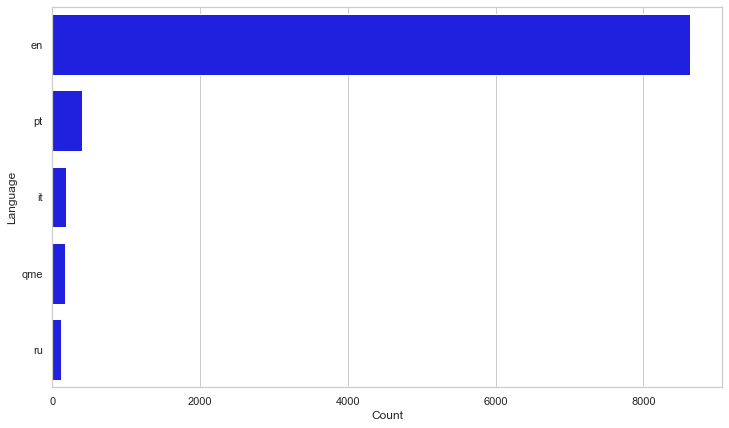

In [56]:
#language_count = data["language"].value_counts()

def lang_chart(data):
    #sns.set_theme(style='whitegrid')
    fig, ax = plt.subplots(figsize = (12,7))
    sns.barplot(data = data[:5], y = 'language', x = 'total', orient = 'h', color = "blue")
    ax.set(xlabel = 'Count', ylabel = 'Language')
    #fig.suptitle('5 Most Used Languages in Tweets', fontsize = 18, fontweight = 'light')

language_count = pd.DataFrame(data['language'].value_counts().reset_index().values, columns = ['language', 'total'])
lang_chart(language_count)
#print(language_count)

In [10]:
## most of the tweets are in English which is a good thing for us.
## now we can prepare the task for sentiment analysis
## links, punctuations, symbols and other language errors are removed from the tweet


In [11]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword = set(stopwords.words("english"))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://S+|www.\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)

[nltk_data] Downloading package stopwords to C:\Users\IYANU
[nltk_data]     Egbuwalo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


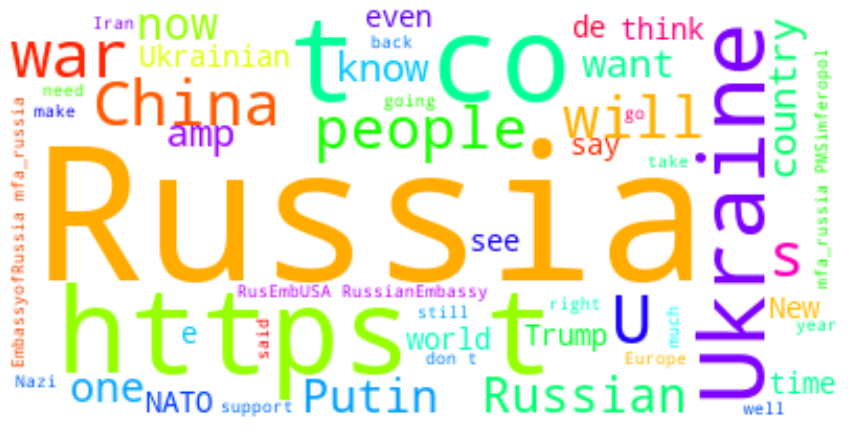

In [59]:
## now we check out the most used words

text = " ".join(i for i in data.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords, max_words = 50, background_color = "white", colormap = 'hsv').generate(text)
##wordcloud = WordCloud().generate(text)

plt.figure(figsize = (15,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [13]:
## adding 3 columns as positive, negative and neutral by calculating the
## sentiment scores of the tweets

In [61]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet"]]
data = data[["tweet", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to C:\Users\IYANU
[nltk_data]     Egbuwalo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                               tweet  Positive  Negative  \
0  @PalmerReport "By using Ukraine to fight Russi...     0.019     0.409   
1      @AlishbaBaigPTI @CNN Open criticism of Russia     0.000     0.367   
2  @RJ_Macnaughton @aaronjmate Of course there ar...     0.043     0.347   
3  @anderssandberg much more likely for iran (or ...     0.000     0.000   
4  @lockwoodwes Are we ready to mask up again? Is...     0.125     0.177   

   Neutral  
0    0.572  
1    0.633  
2    0.609  
3    1.000  
4    0.699  


In [15]:
## looking back at the most frequent words used by  people with positive sentiments

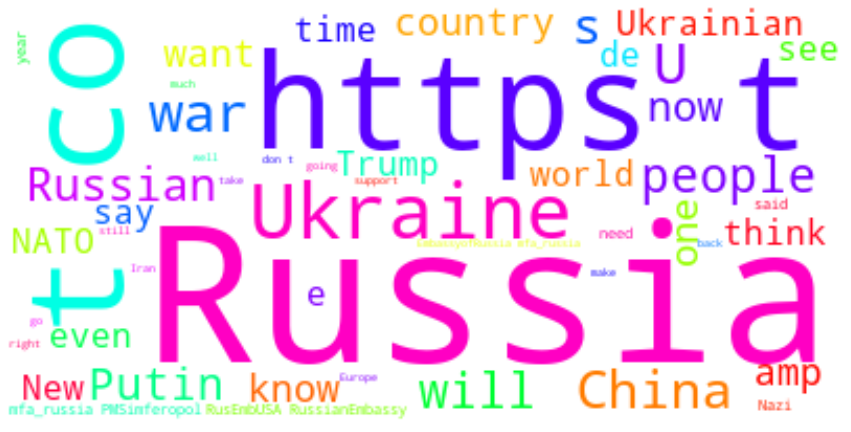

In [67]:
positive = ' '.join([i for i in data['tweet'][data['Positive'] > data["Negative"]]])

stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords, max_words = 50, background_color = "white", colormap = 'hsv').generate(text)

    #wordcloud = WordCloud(background_color = "white", colormap = 'hsv', collocations=True,
                         # max_words=max_phrase, random_state = 47, collocation_threshold = frequency).generate(text)

plt.figure(figsize = (15,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [17]:
## looking at the most used words by people with negative sentiments

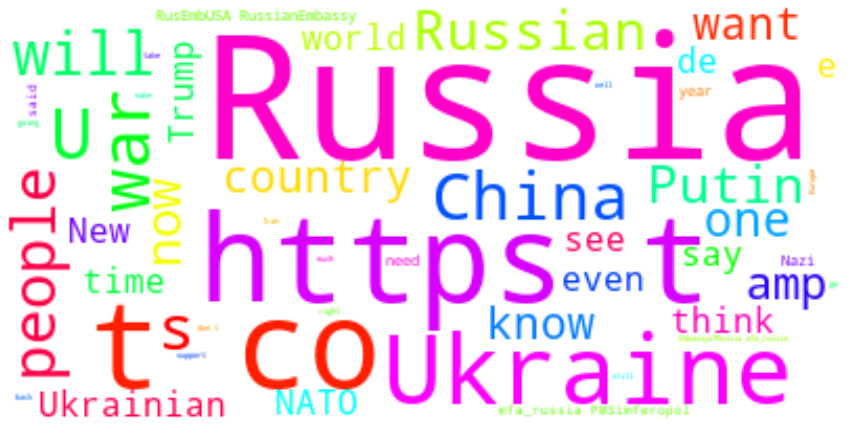

In [69]:
negative = ' '.join([i for i in data['tweet'][data['Negative'] > data['Positive']]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords, max_words = 50, background_color = 'white', colormap = 'hsv').generate(text)
plt.figure(figsize = (15,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [19]:
## this segment collate words that often appear together. 

In [79]:
## this code shows cloud of words that are often used together

def generate_bigram_wordcloud(text, group = 'All'):
    max_phrase = 20
    frequency = 4
    #chart_title = '{} Most Common Bigram Terms in {} Sentiment Tweets'.format(max_phrase, group)
    fig, ax = plt.subplots(figsize = (12,7))
    wordcloud = WordCloud(background_color = "white", colormap = 'hsv', collocations=True,
                         max_words=max_phrase, random_state = 47, collocation_threshold = frequency).generate(text)
    plt.imshow(wordcloud, interpolation = 'bilinear', aspect = 'auto')
    plt.axis('off')
    #fig.suptitle(chart_title, fontsize = 22, fontweight = 'bold')
    plt.show()

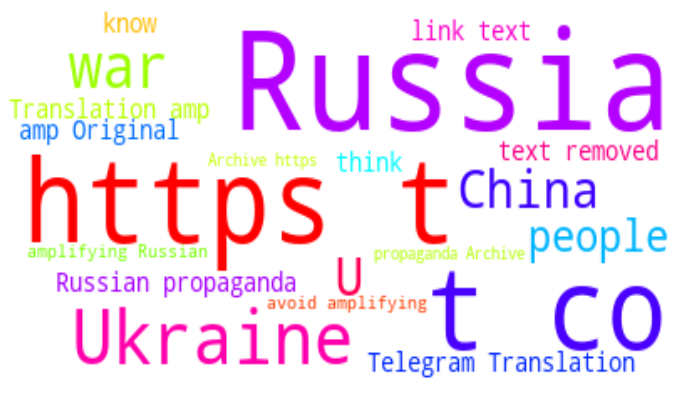

In [80]:
generate_bigram_wordcloud(negative, 'Negative')

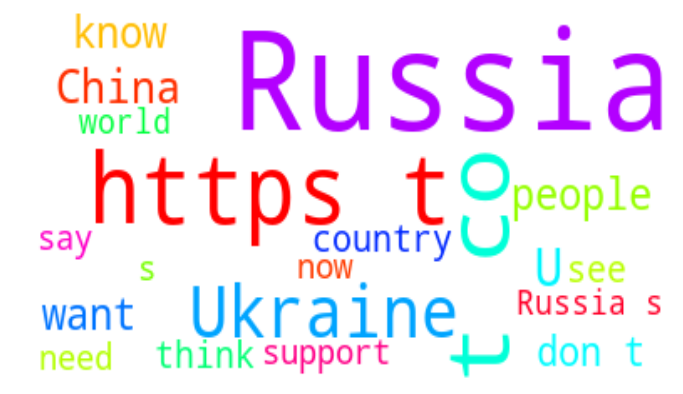

In [81]:
generate_bigram_wordcloud(positive, 'Positive')